In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("coiembatore.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,22.94,96.56,0.27,94.57,6.41
1,2011,6,1,6,23.34,95.69,0.22,94.64,5.31
2,2011,6,1,7,24.06,92.81,0.25,94.70,5.54
3,2011,6,1,8,24.80,87.00,0.41,94.76,6.51
4,2011,6,1,9,25.58,80.75,0.81,94.79,7.26
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,24.55,89.81,0.02,94.61,4.30
86204,2021,4,1,1,24.39,90.62,0.02,94.55,3.97
86205,2021,4,1,2,24.23,91.12,0.03,94.51,3.81
86206,2021,4,1,3,24.00,91.94,0.03,94.52,3.66


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


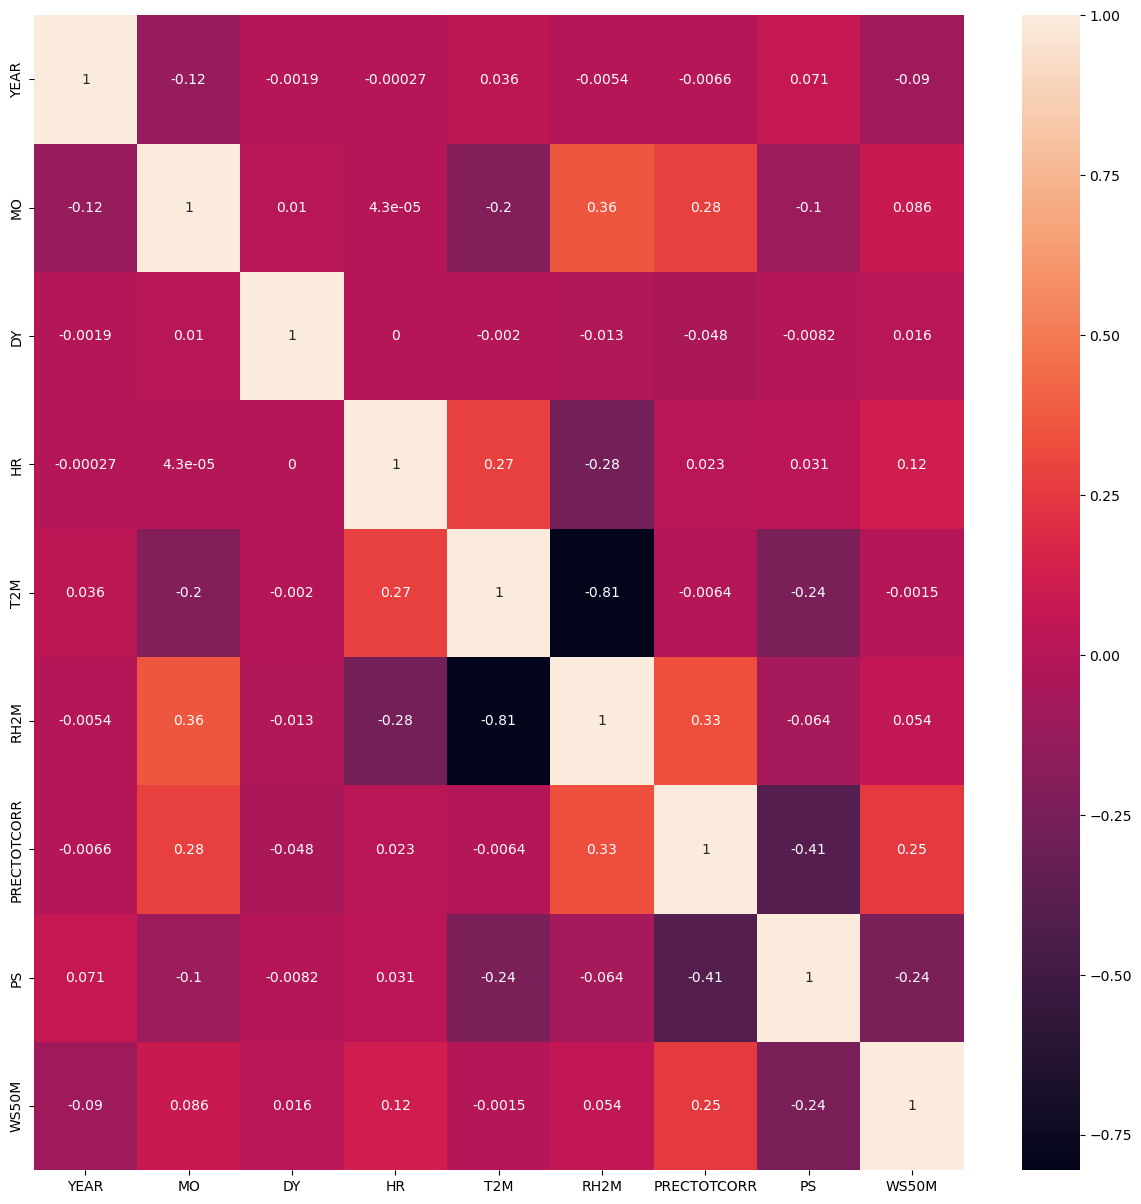

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

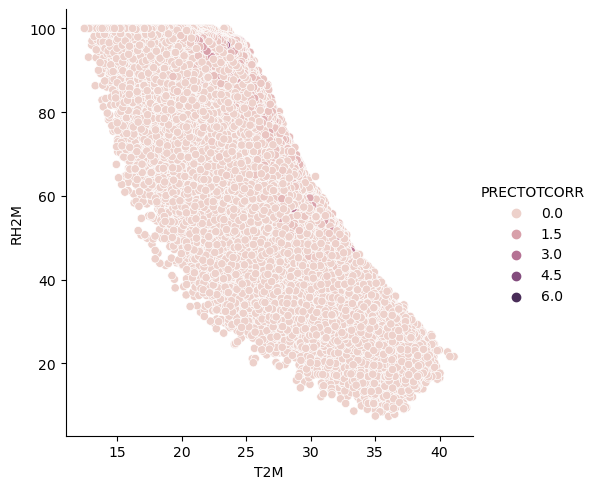

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


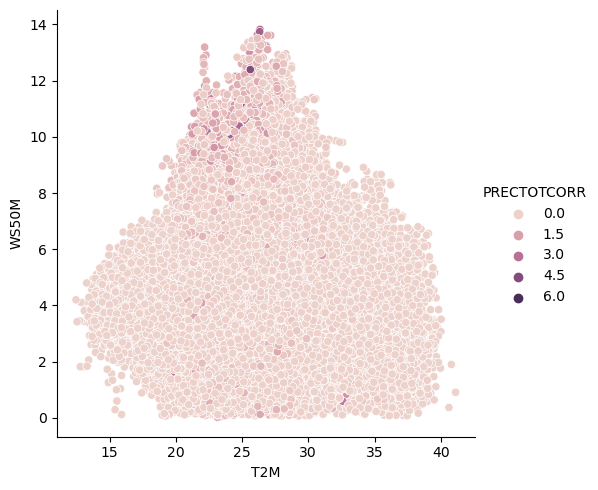

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


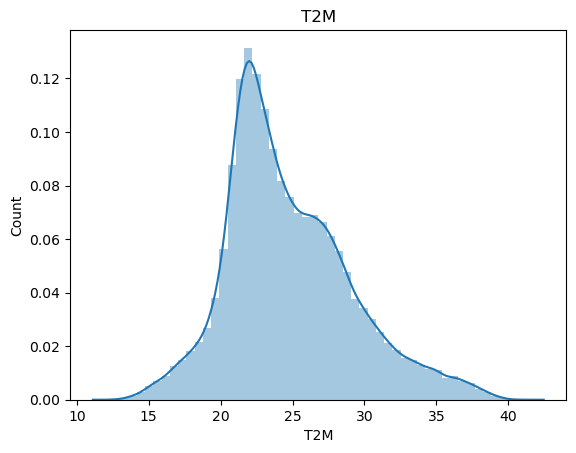

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


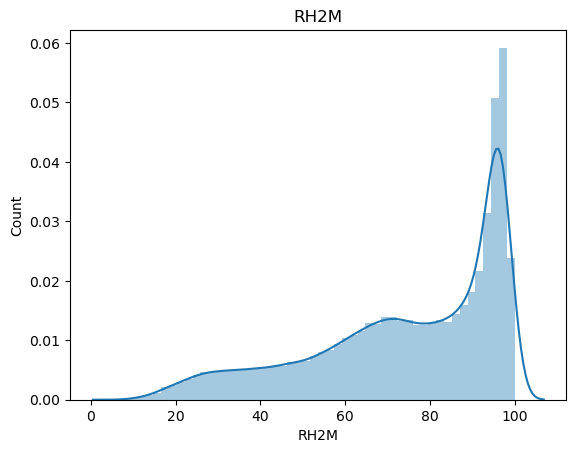

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


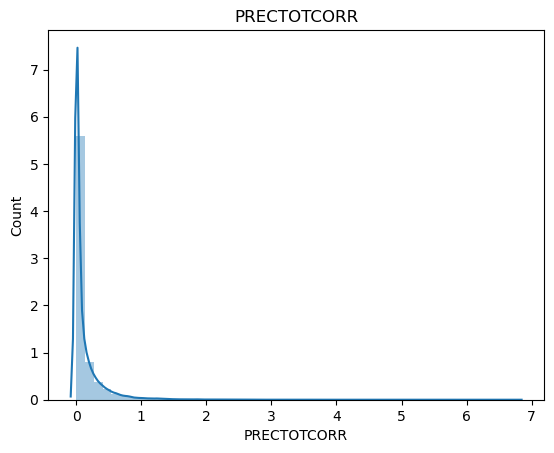

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


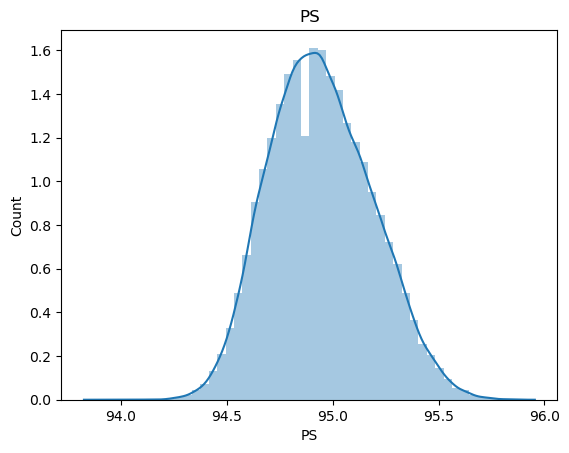

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


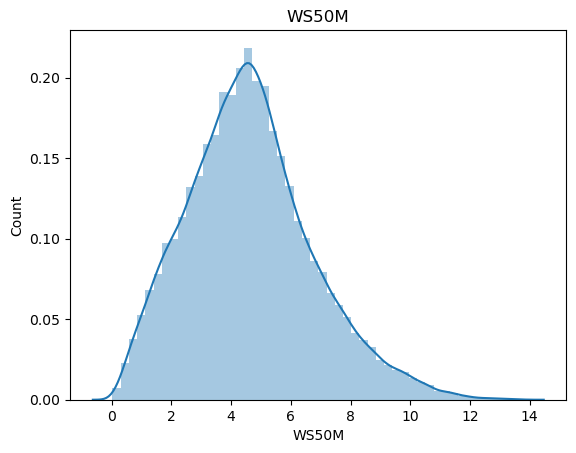

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

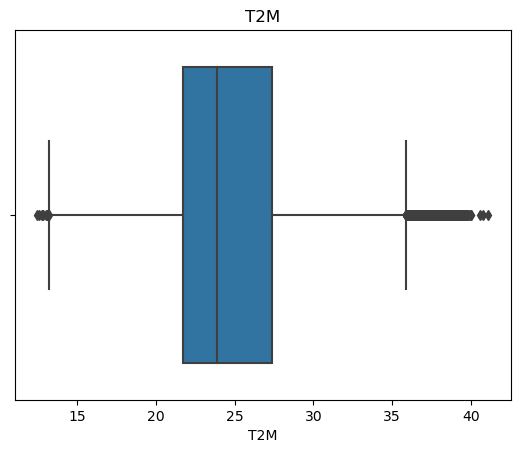

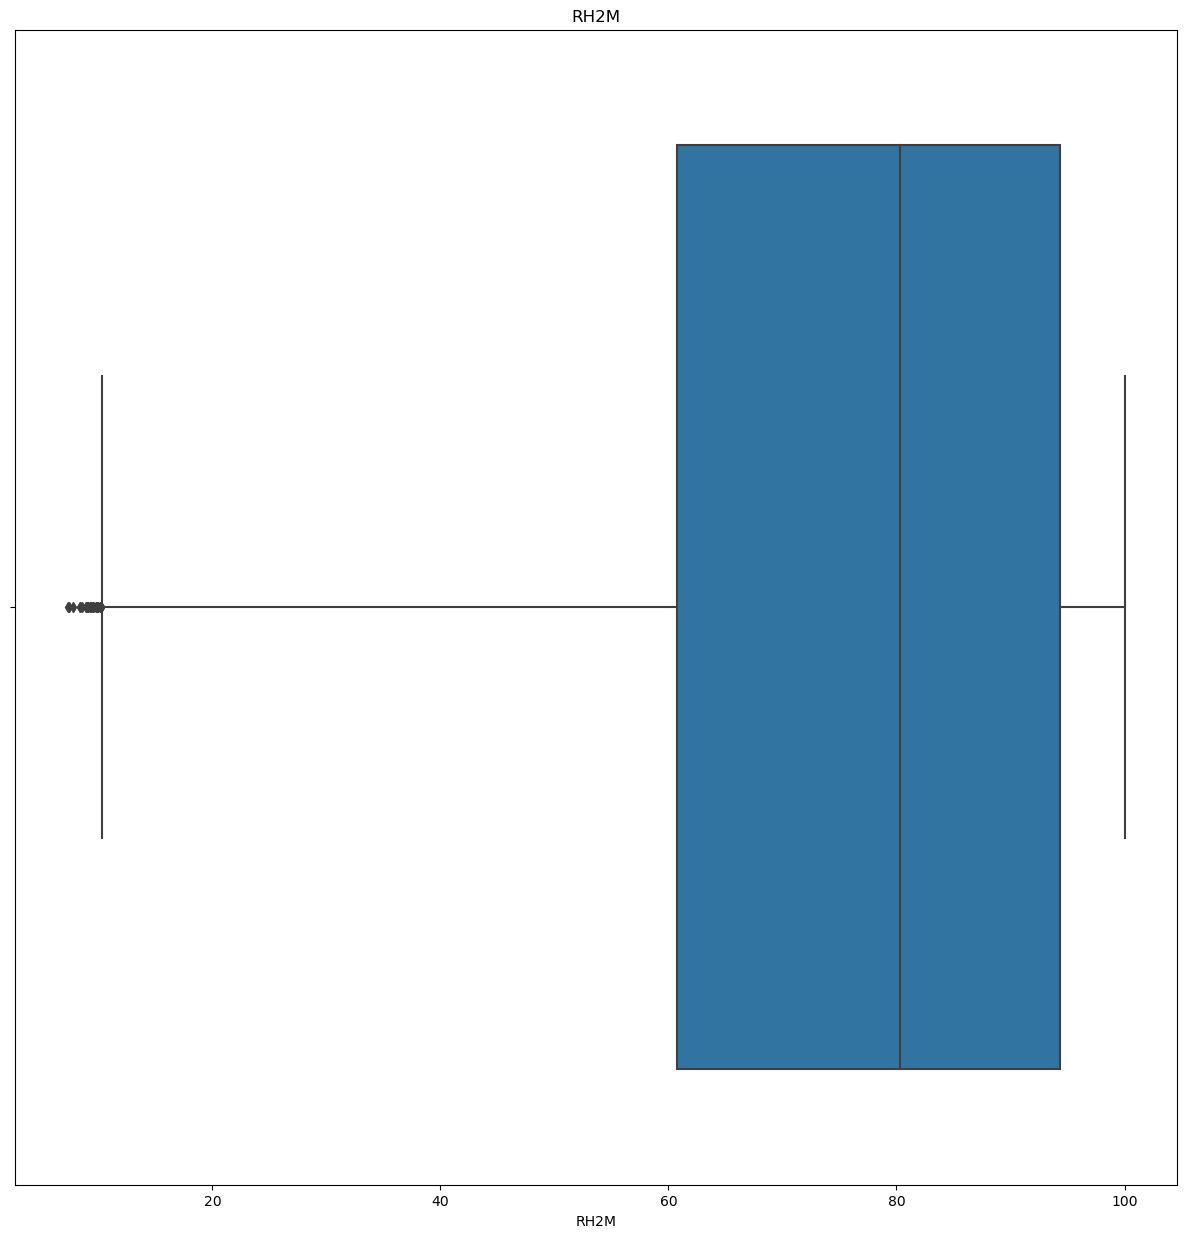

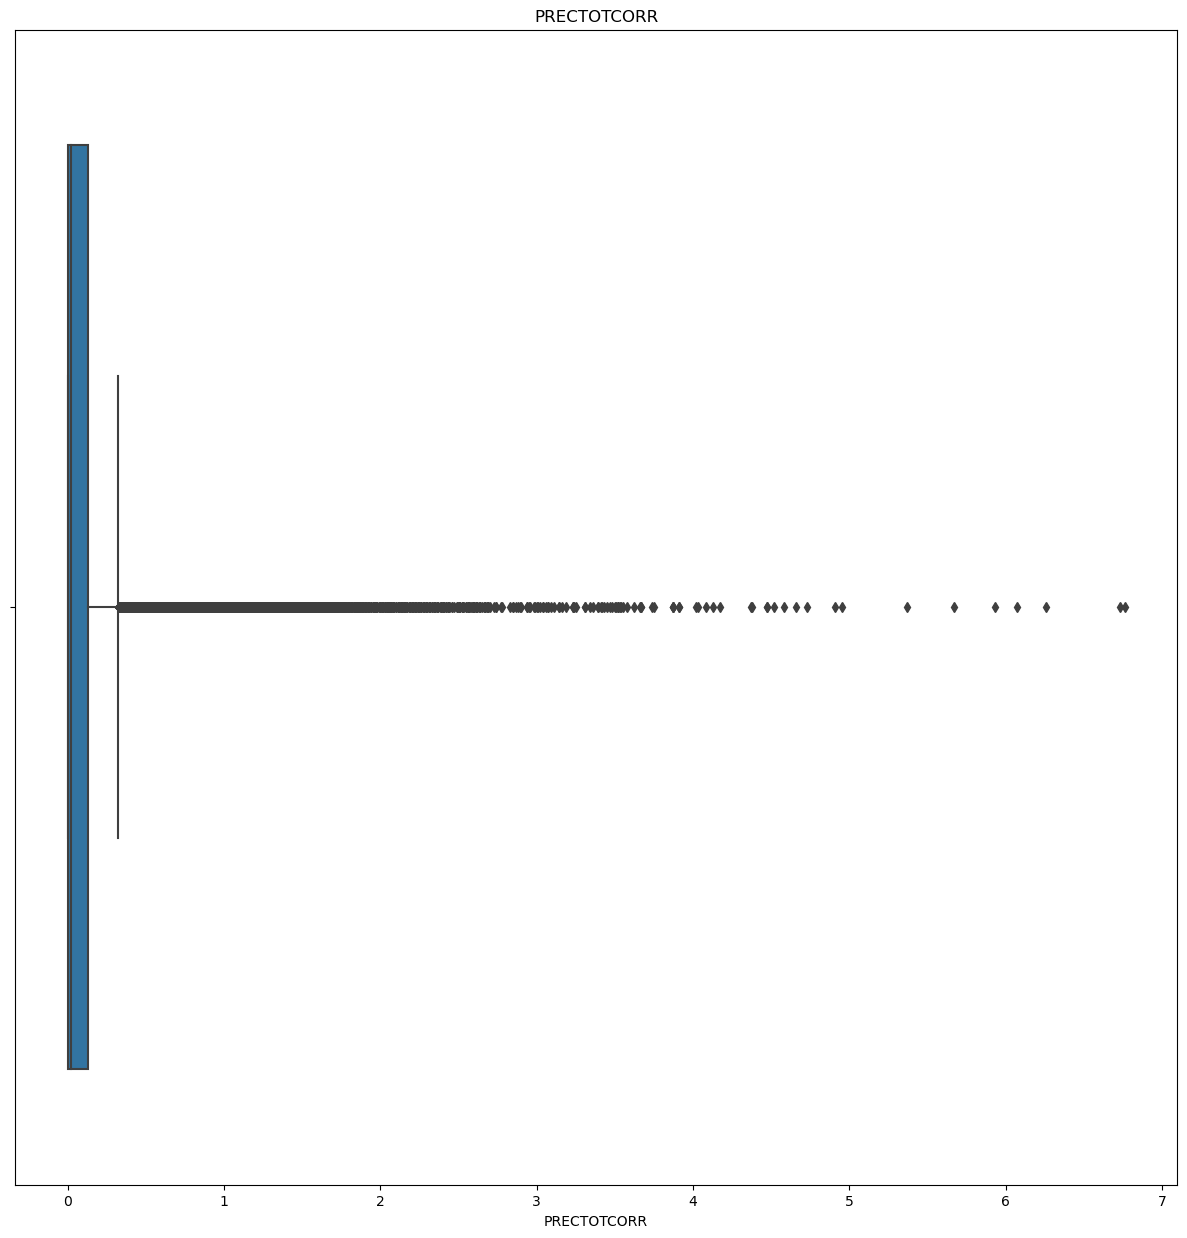

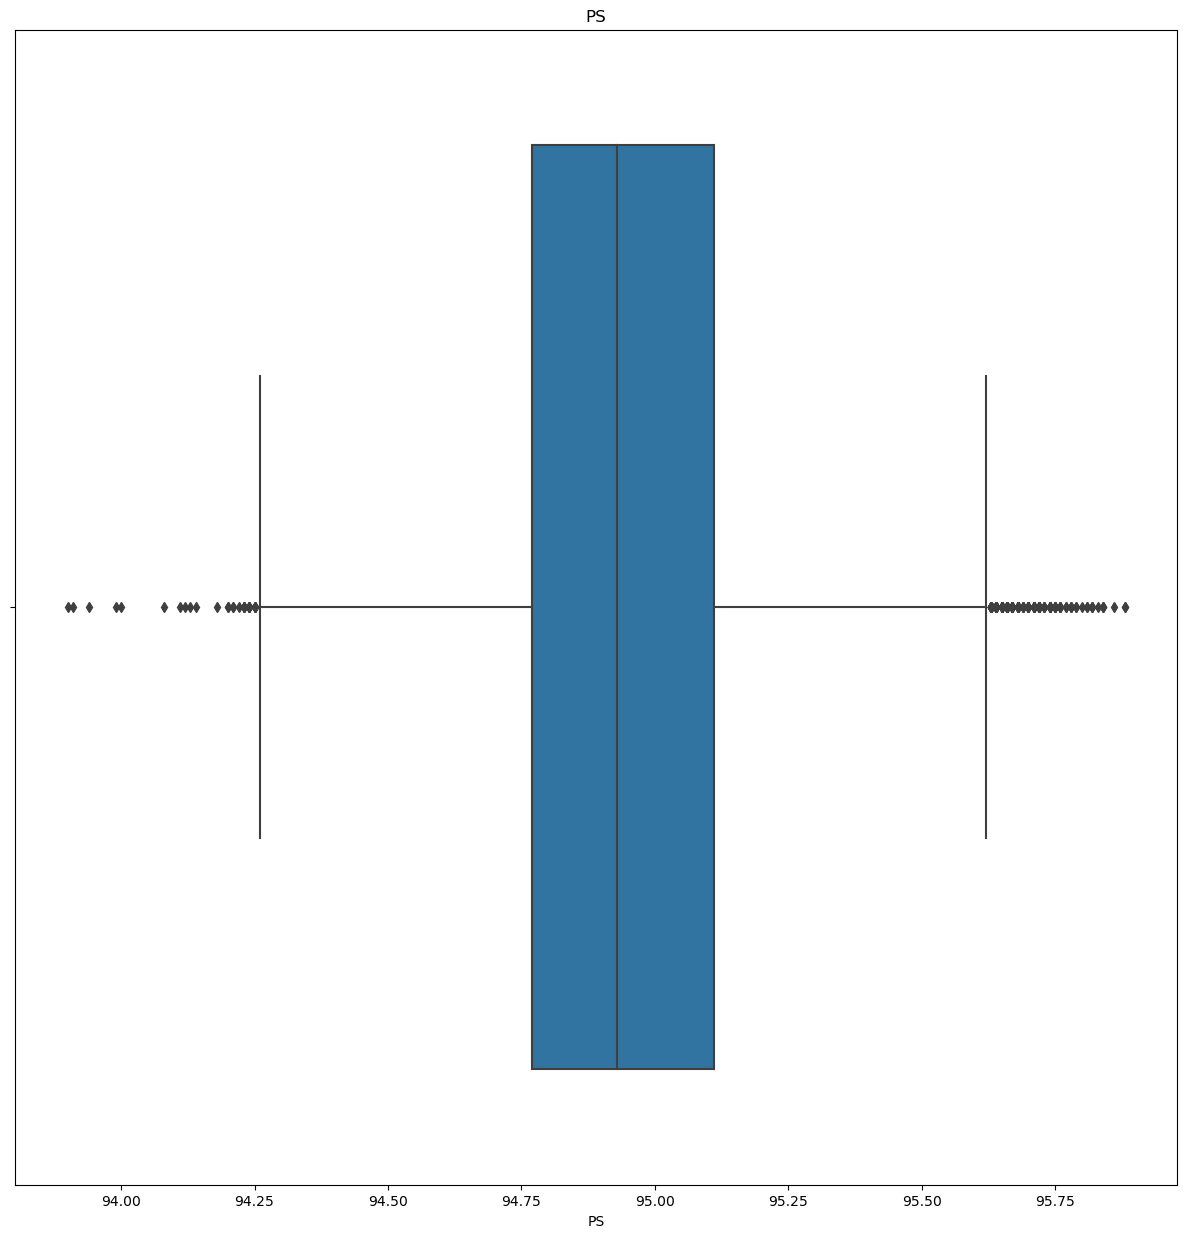

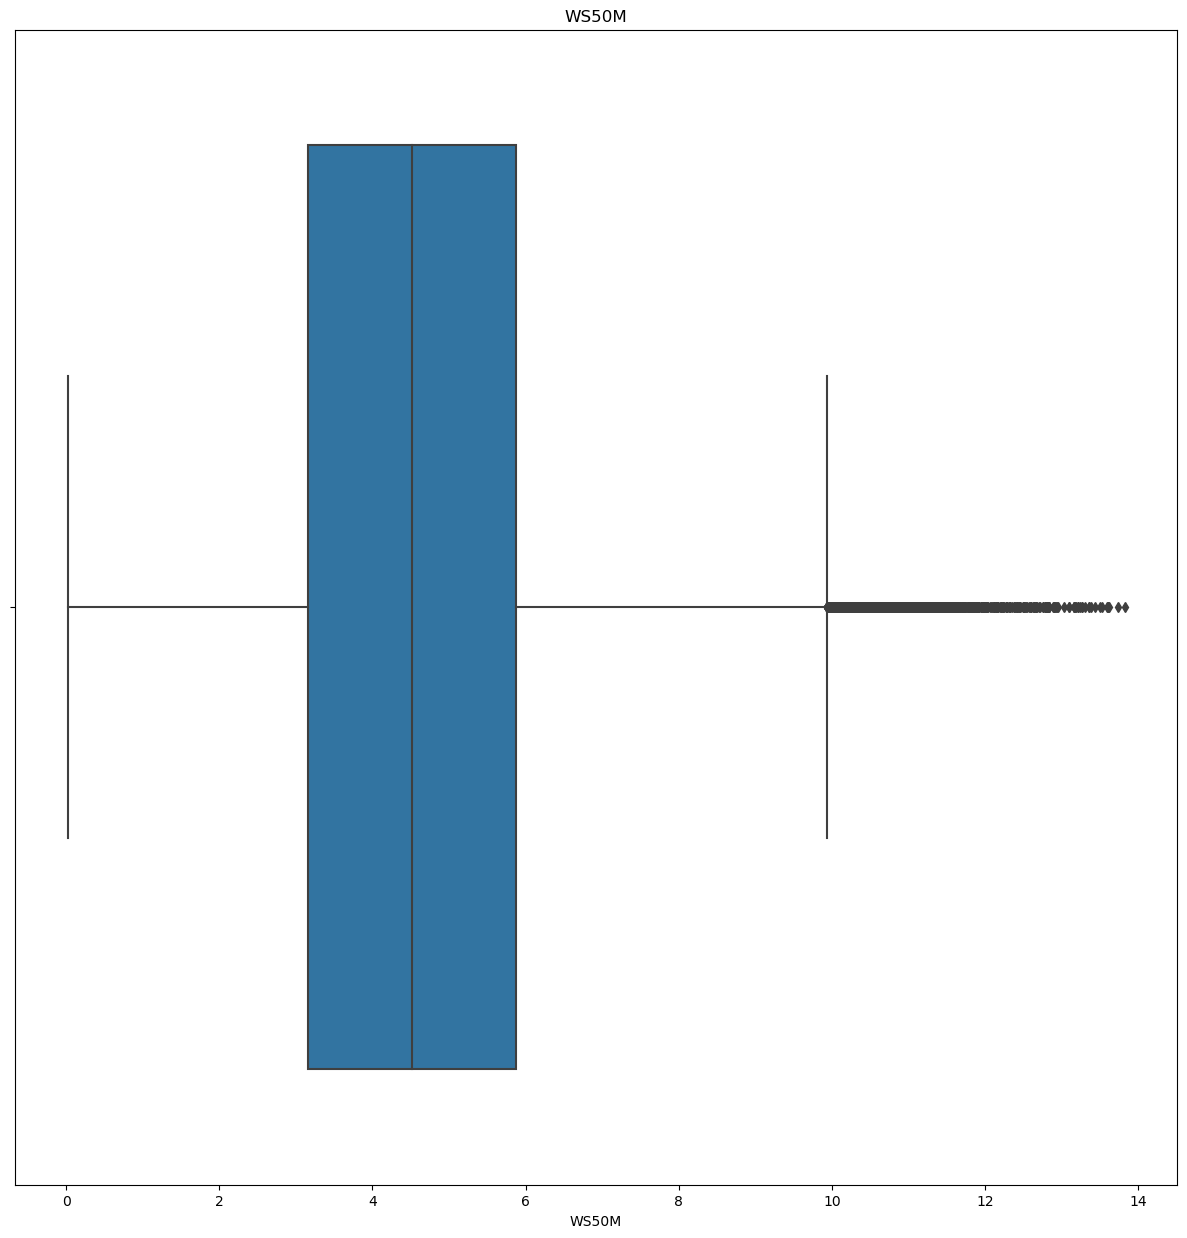

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[22.94 23.34 24.06 ... 13.81 14.15 13.84]
<class 'numpy.ndarray'>
[0.27 0.22 0.25 0.41 0.81 1.5  1.83 2.23 2.26 2.27 2.19 2.02 1.82 1.91
 1.85 1.68 1.23 1.21 1.39 1.51 1.9  2.25 2.28 1.88 1.55 1.22 1.05 0.39
 0.45 0.59 0.69 0.73 0.83 0.8  0.77 0.67 0.63 0.6  0.56 0.53 0.47 0.46
 0.48 0.57 0.54 0.5  0.4  0.35 0.52 0.7  0.86 0.62 0.43 0.44 0.37 0.38
 0.33 0.21 0.17 0.15 0.12 0.13 0.2  0.26 0.42 0.58 0.71 0.76 0.55 0.32
 0.24 0.19 0.16 0.14 0.66 0.74 0.68 0.29 0.23 0.28 0.3  0.31 0.34 0.51
 0.08 0.05 0.04 0.02 0.07 0.09 0.06 0.1  0.03 0.01 0.64 0.18 0.   0.49
 0.89 0.88 0.36 0.11 1.09 1.35 1.45 1.27 0.93 1.04 1.46 1.32 1.07 0.72
 0.92 1.28 1.33 0.75 1.03 0.82 0.84 0.65 0.61 0.78 0.85 1.38 1.   1.01
 1.17 1.2  1.15 0.96 1.65 2.15 1.95 1.7  1.36 0.97 0.87 0.91 0.95 0.9
 1.18 1.29 1.3  1.12 0.99 1.47 1.26 1.24 1.66 1.72 1.64 1.74 1.93 2.11
 1.54 0.98 1.56 1.57 0.79 1.4  1.87 1.79 1.48 1.06 1.08 1.14 1.97 2.17
 1.75 1.02 1.16 0.94 1.31 1.41 2.37 2.68 2.13 1.84 1.42 1.34 1.25 1.77
 2.2  2.08 1

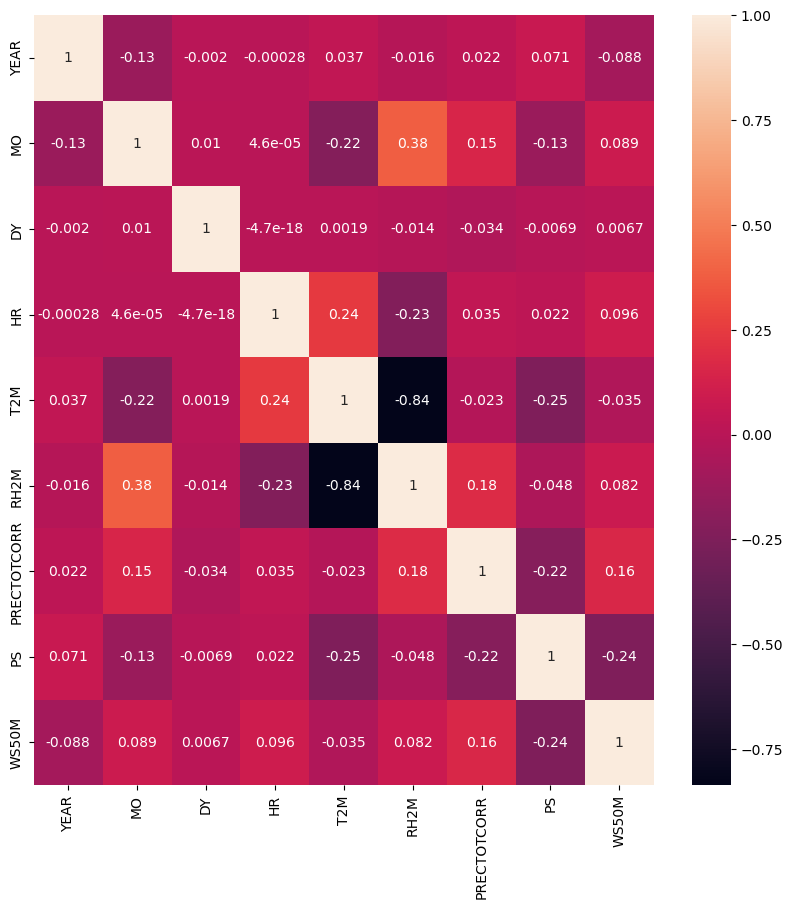

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


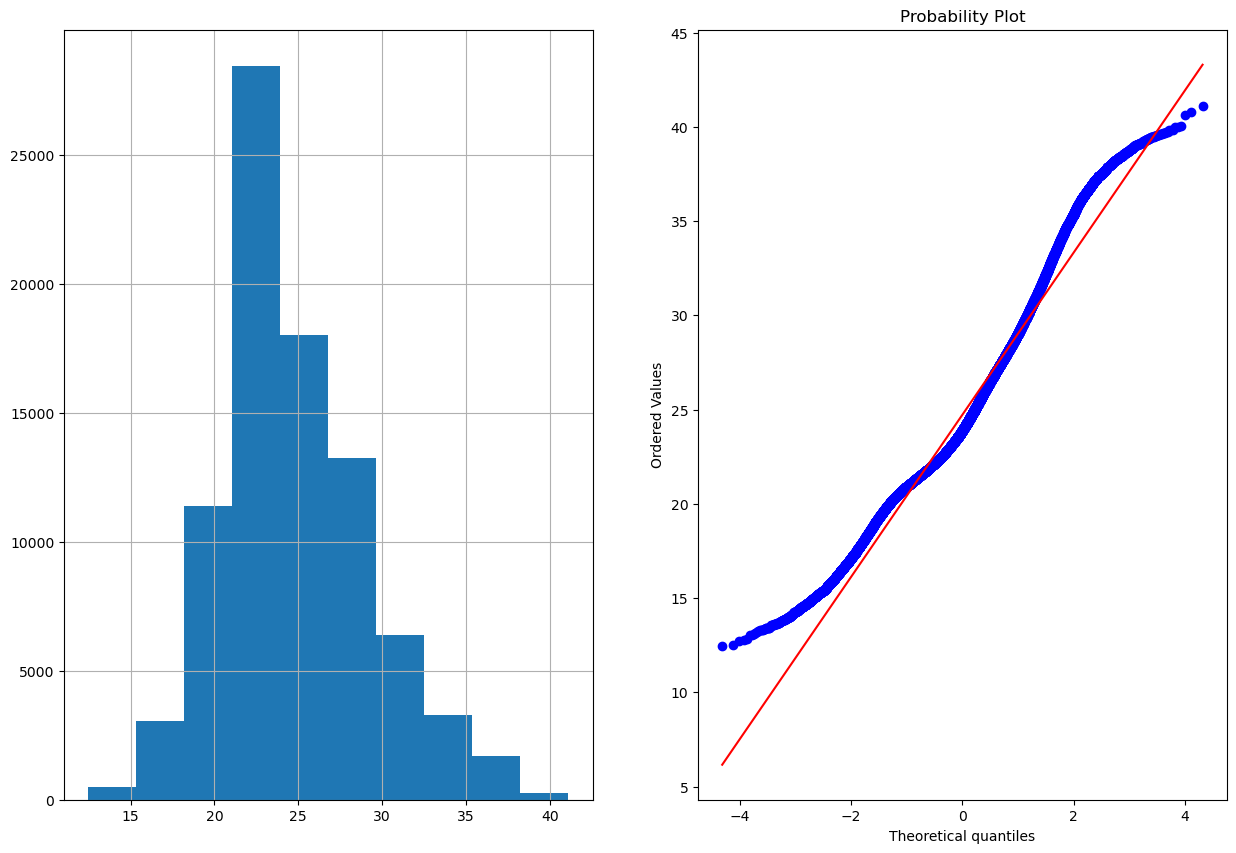

RH2M


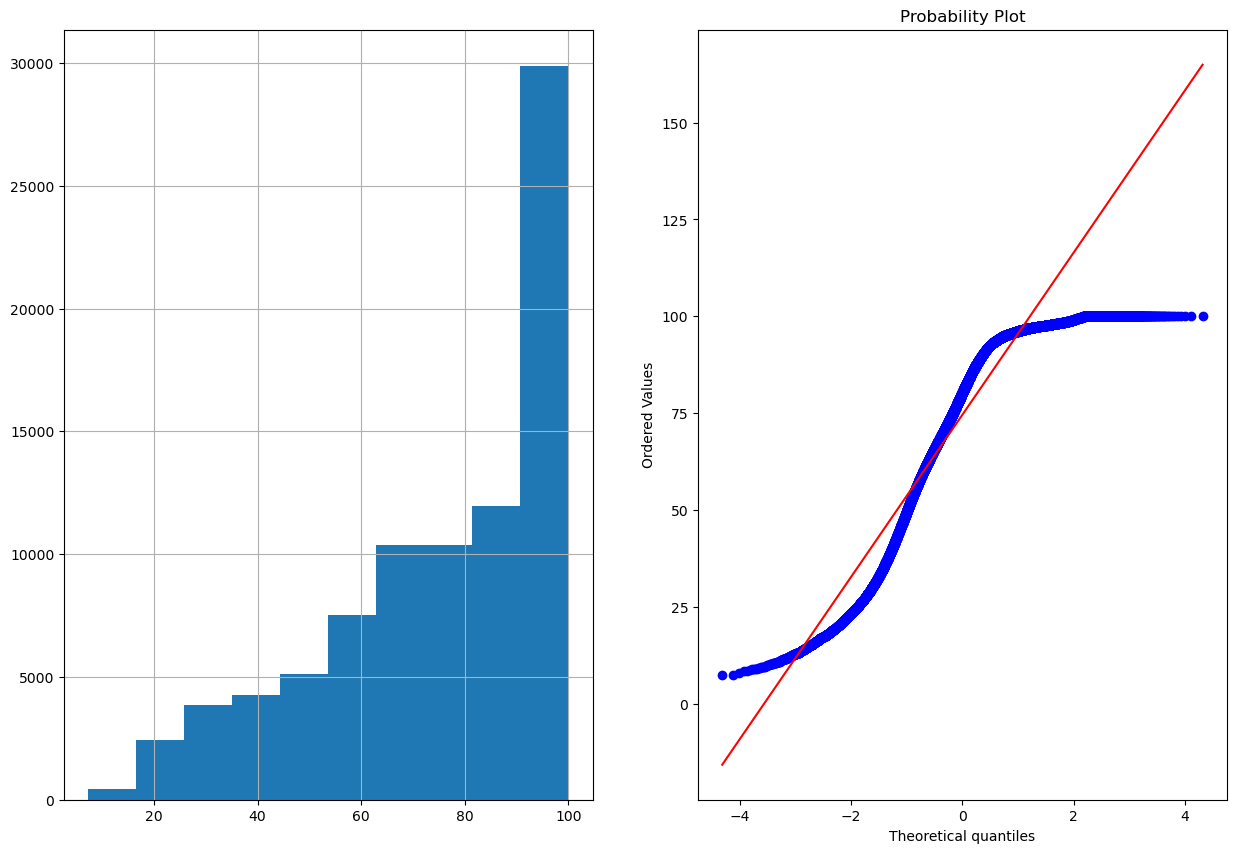

PRECTOTCORR


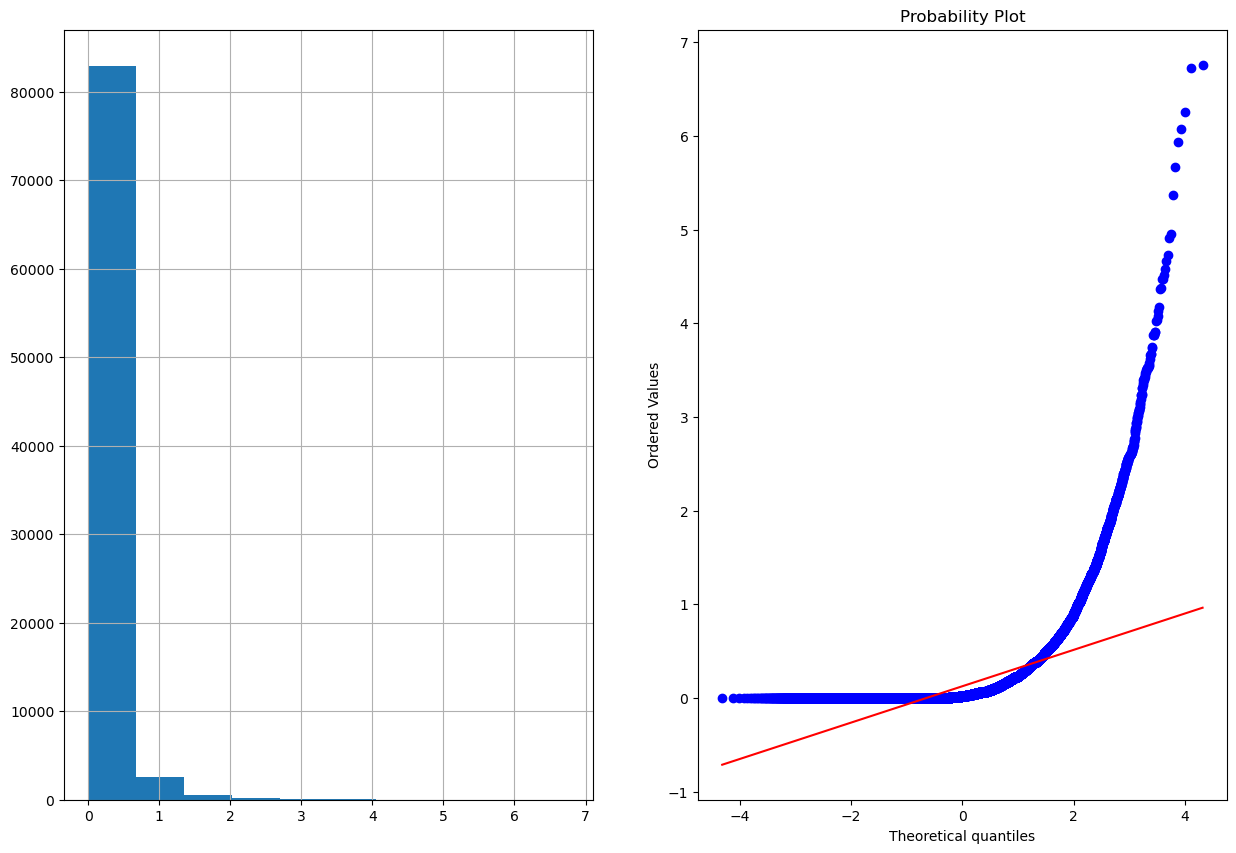

PS


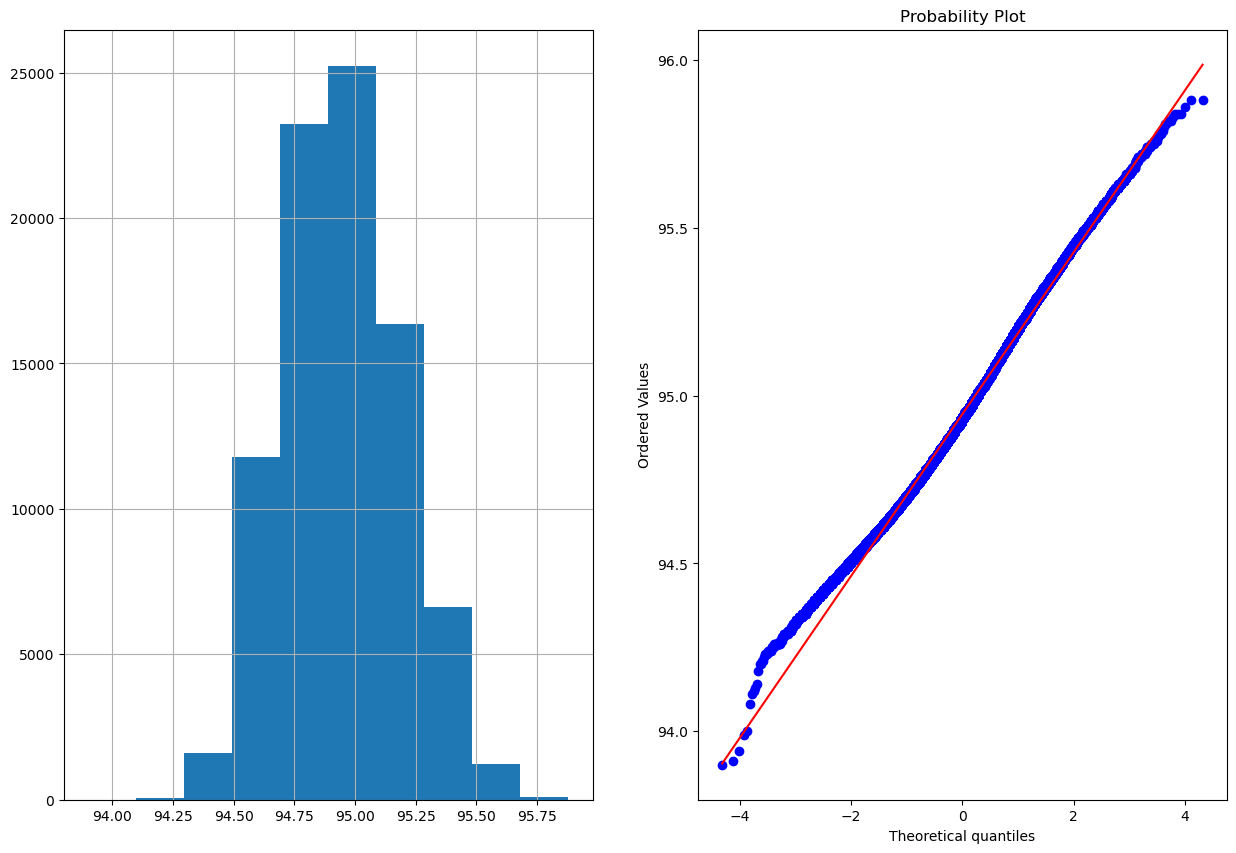

WS50M


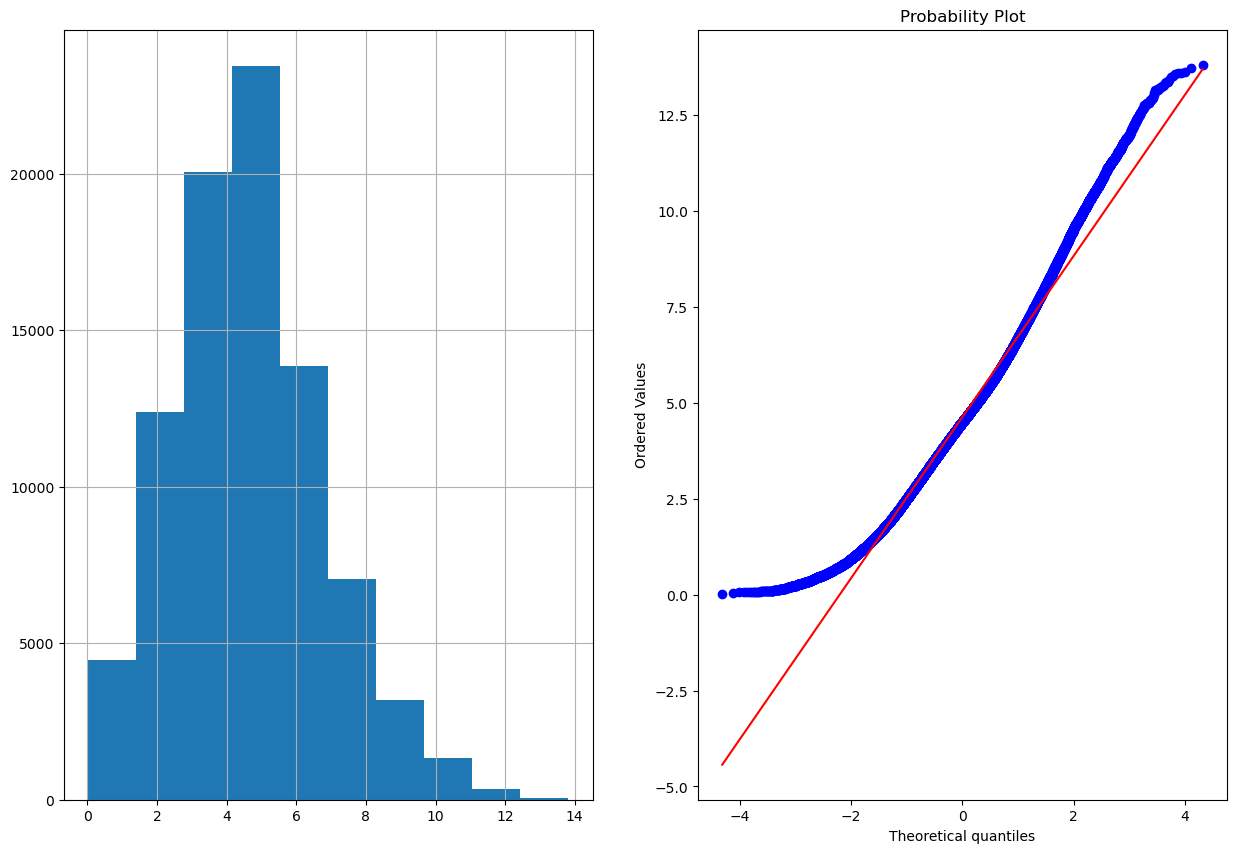

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.27, 0.22, 0.25, 0.41, 0.81, 1.5 , 1.83, 2.23, 2.26, 2.27, 2.19,
       2.02, 1.82, 1.91, 1.85, 1.68, 1.23, 1.21, 1.39, 1.51, 1.9 , 2.25,
       2.28, 1.88, 1.55, 1.22, 1.05, 0.39, 0.45, 0.59, 0.69, 0.73, 0.83,
       0.8 , 0.77, 0.67, 0.63, 0.6 , 0.56, 0.53, 0.47, 0.46, 0.48, 0.57,
       0.54, 0.5 , 0.4 , 0.35, 0.52, 0.7 , 0.86, 0.62, 0.43, 0.44, 0.37,
       0.38, 0.33, 0.21, 0.17, 0.15, 0.12, 0.13, 0.2 , 0.26, 0.42, 0.58,
       0.71, 0.76, 0.55, 0.32, 0.24, 0.19, 0.16, 0.14, 0.66, 0.74, 0.68,
       0.29, 0.23, 0.28, 0.3 , 0.31, 0.34, 0.51, 0.08, 0.05, 0.04, 0.02,
       0.07, 0.09, 0.06, 0.1 , 0.03, 0.01, 0.64, 0.18, 0.  , 0.49, 0.89,
       0.88, 0.36, 0.11, 1.09, 1.35, 1.45, 1.27, 0.93, 1.04, 1.46, 1.32,
       1.07, 0.72, 0.92, 1.28, 1.33, 0.75, 1.03, 0.82, 0.84, 0.65, 0.61,
       0.78, 0.85, 1.38, 1.  , 1.01, 1.17, 1.2 , 1.15, 0.96, 1.65, 2.15,
       1.95, 1.7 , 1.36, 0.97, 0.87, 0.91, 0.95, 0.9 , 1.18, 1.29, 1.3 ,
       1.12, 0.99, 1.47, 1.26, 1.24, 1.66, 1.72, 1.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,22.94,0.0
1,23.34,0.0
2,24.06,0.0
3,24.80,0.0
4,25.58,0.0
...,...,...
86203,24.55,0.0
86204,24.39,0.0
86205,24.23,0.0
86206,24.00,0.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,22.94,0.0,5
1,23.34,0.0,6
2,24.06,0.0,7
3,24.80,0.0,8
4,25.58,0.0,9
...,...,...,...
86203,24.55,0.0,0
86204,24.39,0.0,1
86205,24.23,0.0,2
86206,24.00,0.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,22.94,0.0,5,1
1,23.34,0.0,6,1
2,24.06,0.0,7,1
3,24.80,0.0,8,1
4,25.58,0.0,9,1
...,...,...,...,...
86203,24.55,0.0,0,1
86204,24.39,0.0,1,1
86205,24.23,0.0,2,1
86206,24.00,0.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,22.94,0.0,5,1,6
1,23.34,0.0,6,1,6
2,24.06,0.0,7,1,6
3,24.80,0.0,8,1,6
4,25.58,0.0,9,1,6
...,...,...,...,...,...
86203,24.55,0.0,0,1,4
86204,24.39,0.0,1,1,4
86205,24.23,0.0,2,1,4
86206,24.00,0.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,22.94,0.0,5,1,6,2011
1,23.34,0.0,6,1,6,2011
2,24.06,0.0,7,1,6,2011
3,24.80,0.0,8,1,6,2011
4,25.58,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,24.55,0.0,0,1,4,2021
86204,24.39,0.0,1,1,4,2021
86205,24.23,0.0,2,1,4,2021
86206,24.00,0.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,22.94,0.0,5,1,6,2011
1,23.34,0.0,6,1,6,2011
2,24.06,0.0,7,1,6,2011
3,24.80,0.0,8,1,6,2011
4,25.58,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,24.55,0.0,0,1,4,2021
86204,24.39,0.0,1,1,4,2021
86205,24.23,0.0,2,1,4,2021
86206,24.00,0.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,22.94,0.0,5,1,6,2011,96.56
1,23.34,0.0,6,1,6,2011,95.69
2,24.06,0.0,7,1,6,2011,92.81
3,24.80,0.0,8,1,6,2011,87.00
4,25.58,0.0,9,1,6,2011,80.75
...,...,...,...,...,...,...,...
86203,24.55,0.0,0,1,4,2021,89.81
86204,24.39,0.0,1,1,4,2021,90.62
86205,24.23,0.0,2,1,4,2021,91.12
86206,24.00,0.0,3,1,4,2021,91.94


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,22.94,0.0,5,1,6,2011,96.56,6.41
1,23.34,0.0,6,1,6,2011,95.69,5.31
2,24.06,0.0,7,1,6,2011,92.81,5.54
3,24.80,0.0,8,1,6,2011,87.00,6.51
4,25.58,0.0,9,1,6,2011,80.75,7.26
...,...,...,...,...,...,...,...,...
86203,24.55,0.0,0,1,4,2021,89.81,4.30
86204,24.39,0.0,1,1,4,2021,90.62,3.97
86205,24.23,0.0,2,1,4,2021,91.12,3.81
86206,24.00,0.0,3,1,4,2021,91.94,3.66


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,22.94,0.0,5,1,6,2011,96.56,6.41,6.41
1,23.34,0.0,6,1,6,2011,95.69,5.31,5.31
2,24.06,0.0,7,1,6,2011,92.81,5.54,5.54
3,24.80,0.0,8,1,6,2011,87.00,6.51,6.51
4,25.58,0.0,9,1,6,2011,80.75,7.26,7.26
...,...,...,...,...,...,...,...,...,...
86203,24.55,0.0,0,1,4,2021,89.81,4.30,4.30
86204,24.39,0.0,1,1,4,2021,90.62,3.97,3.97
86205,24.23,0.0,2,1,4,2021,91.12,3.81,3.81
86206,24.00,0.0,3,1,4,2021,91.94,3.66,3.66


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

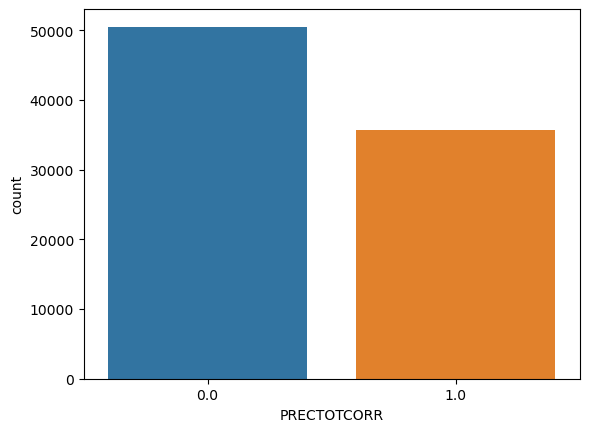

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("coiembatore-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,22.94,0.0,5,1,6,2011,96.56,6.41,6.41
1,23.34,0.0,6,1,6,2011,95.69,5.31,5.31
2,24.06,0.0,7,1,6,2011,92.81,5.54,5.54
3,24.80,0.0,8,1,6,2011,87.00,6.51,6.51
4,25.58,0.0,9,1,6,2011,80.75,7.26,7.26
...,...,...,...,...,...,...,...,...,...
86203,24.55,0.0,0,1,4,2021,89.81,4.30,4.30
86204,24.39,0.0,1,1,4,2021,90.62,3.97,3.97
86205,24.23,0.0,2,1,4,2021,91.12,3.81,3.81
86206,24.00,0.0,3,1,4,2021,91.94,3.66,3.66
